## In this project we would like to use first 8 variables to predict y_Heating_Load and y_Cooling_load. This is an energy efficiency project. [Here](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#) you can learn more about this dataset.

In [3]:
import pandas as pd
import numpy as np

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
Data_Energy = pd.read_excel(url, names = ['Relative_Compactness', 'Surface_Area', 'Wall_Area','Roof_Area', 
                                          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
                                          'y_Heating_Load', 'y_Cooling_Load'])

In [5]:
DE=Data_Energy
DE.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
DE.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area','Roof_Area', 
                                          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
                                          'y_Heating_Load', 'y_Cooling_Load']
DE.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,y_Heating_Load,y_Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:

abs(DE.corr())>=0.3


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,y_Heating_Load,y_Cooling_Load
Relative_Compactness,True,True,False,True,True,False,False,False,True,True
Surface_Area,True,True,False,True,True,False,False,False,True,True
Wall_Area,False,False,True,False,False,False,False,False,True,True
Roof_Area,True,True,False,True,True,False,False,False,True,True
Overall_Height,True,True,False,True,True,False,False,False,True,True
Orientation,False,False,False,False,False,True,False,False,False,False
Glazing_Area,False,False,False,False,False,False,True,False,False,False
Glazing_Area_Distribution,False,False,False,False,False,False,False,True,False,False
y_Heating_Load,True,True,True,True,True,False,False,False,True,True
y_Cooling_Load,True,True,True,True,True,False,False,False,True,True


In [10]:
listOfAllVariables = DE.columns.values
X=DE[listOfAllVariables]
del X['y_Heating_Load']
del X['y_Cooling_Load']
yH =DE['y_Heating_Load']
yC =DE['y_Cooling_Load']

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [12]:
lm = LinearRegression()
lm.fit(X,yH)
print lm.coef_
lm.intercept_

[ -6.34336529e+01  -2.19214611e+12   2.19214611e+12   4.38429221e+12
   4.16072081e+00  -2.70101952e-02   1.98952917e+01   1.98905542e-01]


83.057195312499999

In [13]:
print 'RA', DE.Roof_Area.unique()
print 'OH', DE.Overall_Height.unique()
print 'SA' , DE.Surface_Area.unique()
print 'Orient' , DE.Orientation.unique()
print 'GA' , DE.Glazing_Area.unique()
print 'GAD' , DE.Glazing_Area_Distribution.unique()


RA [ 110.25  122.5   147.    220.5 ]
OH [ 7.   3.5]
SA [ 514.5  563.5  588.   612.5  637.   661.5  686.   710.5  735.   759.5
  784.   808.5]
Orient [2 3 4 5]
GA [ 0.    0.1   0.25  0.4 ]
GAD [0 1 2 3 4 5]


In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='yH ~ X', data = DE).fit()
print lm.summary()
print("P-Vales: ", zip(['Relative_Compactness', 'Surface_Area', 'Wall_Area','Roof_Area', 
                                          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'], 
                      lm.pvalues[1:8]))
print(lm.rsquared)

                            OLS Regression Results                            
Dep. Variable:                     yH   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        20:03:31   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     84.0134     19.034      4.414      0.0

In [15]:
lm = smf.ols(formula='yC ~ X', data = DE).fit()
print lm.summary()
print("P-Vales: ", zip(['Relative_Compactness', 'Surface_Area', 'Wall_Area','Roof_Area', 
                                          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'], 
                      lm.pvalues[1:8]))
print(lm.rsquared)

                            OLS Regression Results                            
Dep. Variable:                     yC   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        20:03:45   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     97.2457     20.765      4.683      0.0

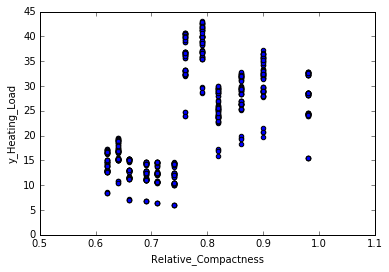

In [16]:
DE.plot(kind = 'scatter',x = 'Relative_Compactness',y='y_Heating_Load')

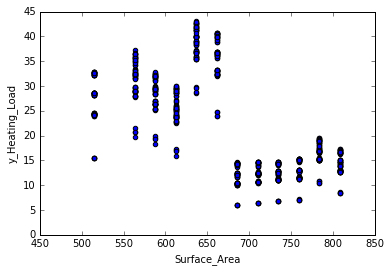

In [17]:
DE.plot(kind = 'scatter',x = 'Surface_Area',y='y_Heating_Load') 

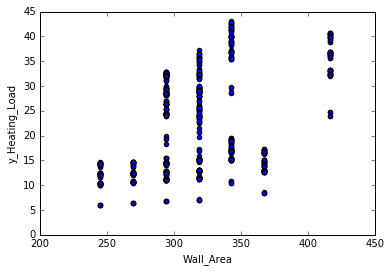

In [18]:
DE.plot(kind = 'scatter',x = 'Wall_Area',y='y_Heating_Load')  

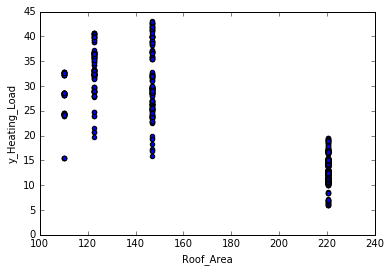

In [19]:
DE.plot(kind = 'scatter',x = 'Roof_Area',y='y_Heating_Load')  

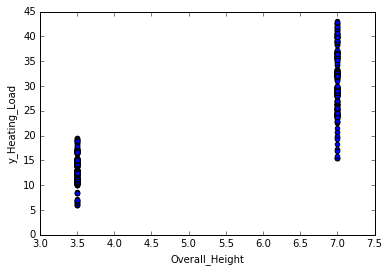

In [20]:
DE.plot(kind = 'scatter',x = 'Overall_Height',y='y_Heating_Load')  

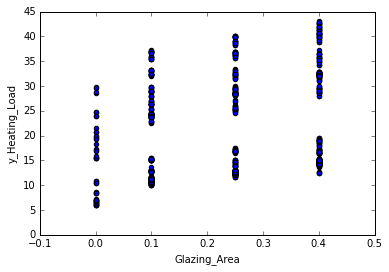

In [21]:
DE.plot(kind = 'scatter',x = 'Glazing_Area',y='y_Heating_Load') 